### Imports

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import math

Using TensorFlow backend.


### Data Examination

In [2]:
mnist_data = input_data.read_data_sets('MNIST_data/', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
input_batch, gt_batch = mnist_data.train.next_batch(10)
x, y = input_batch[0], gt_batch[0]

print(x.shape,y.shape)
print(input_batch.shape,gt_batch.shape)

def imformat(imvec):
  horlen = int(math.sqrt(len(imvec)))
  verlen = horlen

  return np.reshape(imvec,(horlen,verlen))

(784,) (10,)
(10, 784) (10, 10)


1


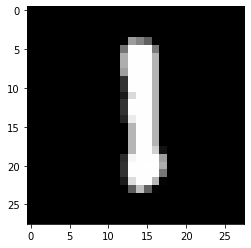

In [4]:
plt.imshow(imformat(x),cmap = 'gray')
print(np.argmax(y))

### Tensorboard

In [5]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2020-02-07 21:33:39--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.231.143.21, 52.86.66.223, 34.227.147.55, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.231.143.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.13M  14.1MB/s    in 0.9s    

2020-02-07 21:33:40 (14.1 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ngrok                   


In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [8]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"


https://83855053.ngrok.io


In [0]:
from keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         write_images=True)

### Network

In [10]:
# we use functional
from keras.layers import Conv2D, BatchNormalization, Dropout, Input, Dense, Flatten



inp = Input(shape = (28,28,1))

y1 = Conv2D(filters = 100,
            kernel_size = (5,5), 
            strides = (1,1), 
            padding = 'same',
            activation = 'relu',
            use_bias = True,
            kernel_initializer = 'glorot_uniform')(inp)

y2 = Conv2D(filters = 25,
            kernel_size = (5,5),
            strides = (1,1),
            padding = 'same',
            activation = 'relu',
            use_bias = True,
            kernel_initializer = 'glorot_uniform')(y1)

y2_flat = Flatten()(y2)

pred = Dense(10,activation='softmax')(y2_flat)




In [0]:
from keras.models import Model
from keras.optimizers import Adam

In [12]:
inzNet = Model(inputs = inp, outputs = pred)
opt = Adam(lr = 0.001)
inzNet.compile(optimizer= opt,
                      loss = 'categorical_crossentropy',
                      metrics = ['accuracy'])

In [13]:
dataset_size = 10000
batch_size = 1000
input_data, gt_data = mnist_data.train.next_batch(dataset_size)
input_data = input_data.reshape((dataset_size,28,28,1))
inzNet.fit(input_data,gt_data,
           batch_size=batch_size,
           epochs=10,
           validation_split=0.1,
           callbacks=[tbCallBack])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 9000 samples, validate on 1000 samples









Epoch 1/10
9000/9000 [==============================] - 9s 969us/step - loss: 1.5072 - acc: 0.5914 - val_loss: 0.7010 - val_acc: 0.7780

Epoch 2/10
9000/9000 [==============================] - 1s 66us/step - loss: 0.5382 - acc: 0.8359 - val_loss: 0.4419 - val_acc: 0.8890
Epoch 3/10
9000/9000 [==============================] - 1s 69us/step - loss: 0.3700 - acc: 0.8907 - val_loss: 0.3427 - val_acc: 0.9130
Epoch 4/10
9000/9000 [==============================] - 1s 67us/step - loss: 0.2904 - acc: 0.9171 - val_loss: 0.2862 - val_acc: 0.9320
Epoch 5/10
9000/9000 [==============================] - 1s 67us/step - loss: 0.2250 - acc: 0.9336 - val_loss: 0.2398 - val_acc: 0.9370
Epoch 6/10
9000/9000 [==============================] - 1s 67us/step - loss: 0.1768 - acc: 0.9497 - val_loss: 0.2014 - val_acc: 0.9490
Epoch 7/10
9000/9000 [============

In [14]:
sample_size = 5000
input_test, gt_test = mnist_data.test.next_batch(sample_size)
input_test = input_test.reshape((sample_size,28,28,1))

inzNet.evaluate(input_test,gt_test)



5000/5000 [==============================] - 0s 70us/step


[0.09565872354470194, 0.9714]